In [2]:
import sys
sys.path.append('/workspace/Documents')
import os
import numpy as np
import pandas as pd
import HeadCT_motion_correction_PAR.functions_collection as ff
import HeadCT_motion_correction_PAR.motion_simulator.transformation as transform
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

main_path = '/mnt/camca_NAS/motion_correction/'

In [3]:
# file
file = pd.read_excel(os.path.join(main_path, 'predict/comparison_list_edited.xlsx'))[0:320]


# box plot

In [10]:
motion_all = file['motion_all_mae']
motion_bottom = file['motion_bottom_mae']
motion_middle = file['motion_middle_mae']
motion_top = file['motion_top_mae']

cnn_all = file['CNN_all_mae']
cnn_bottom = file['CNN_bottom_mae']
cnn_middle = file['CNN_middle_mae']
cnn_top = file['CNN_top_mae']

par_all = file['PAR_all_mae']
par_bottom = file['PAR_bottom_mae']
par_middle = file['PAR_middle_mae']
par_top = file['PAR_top_mae']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

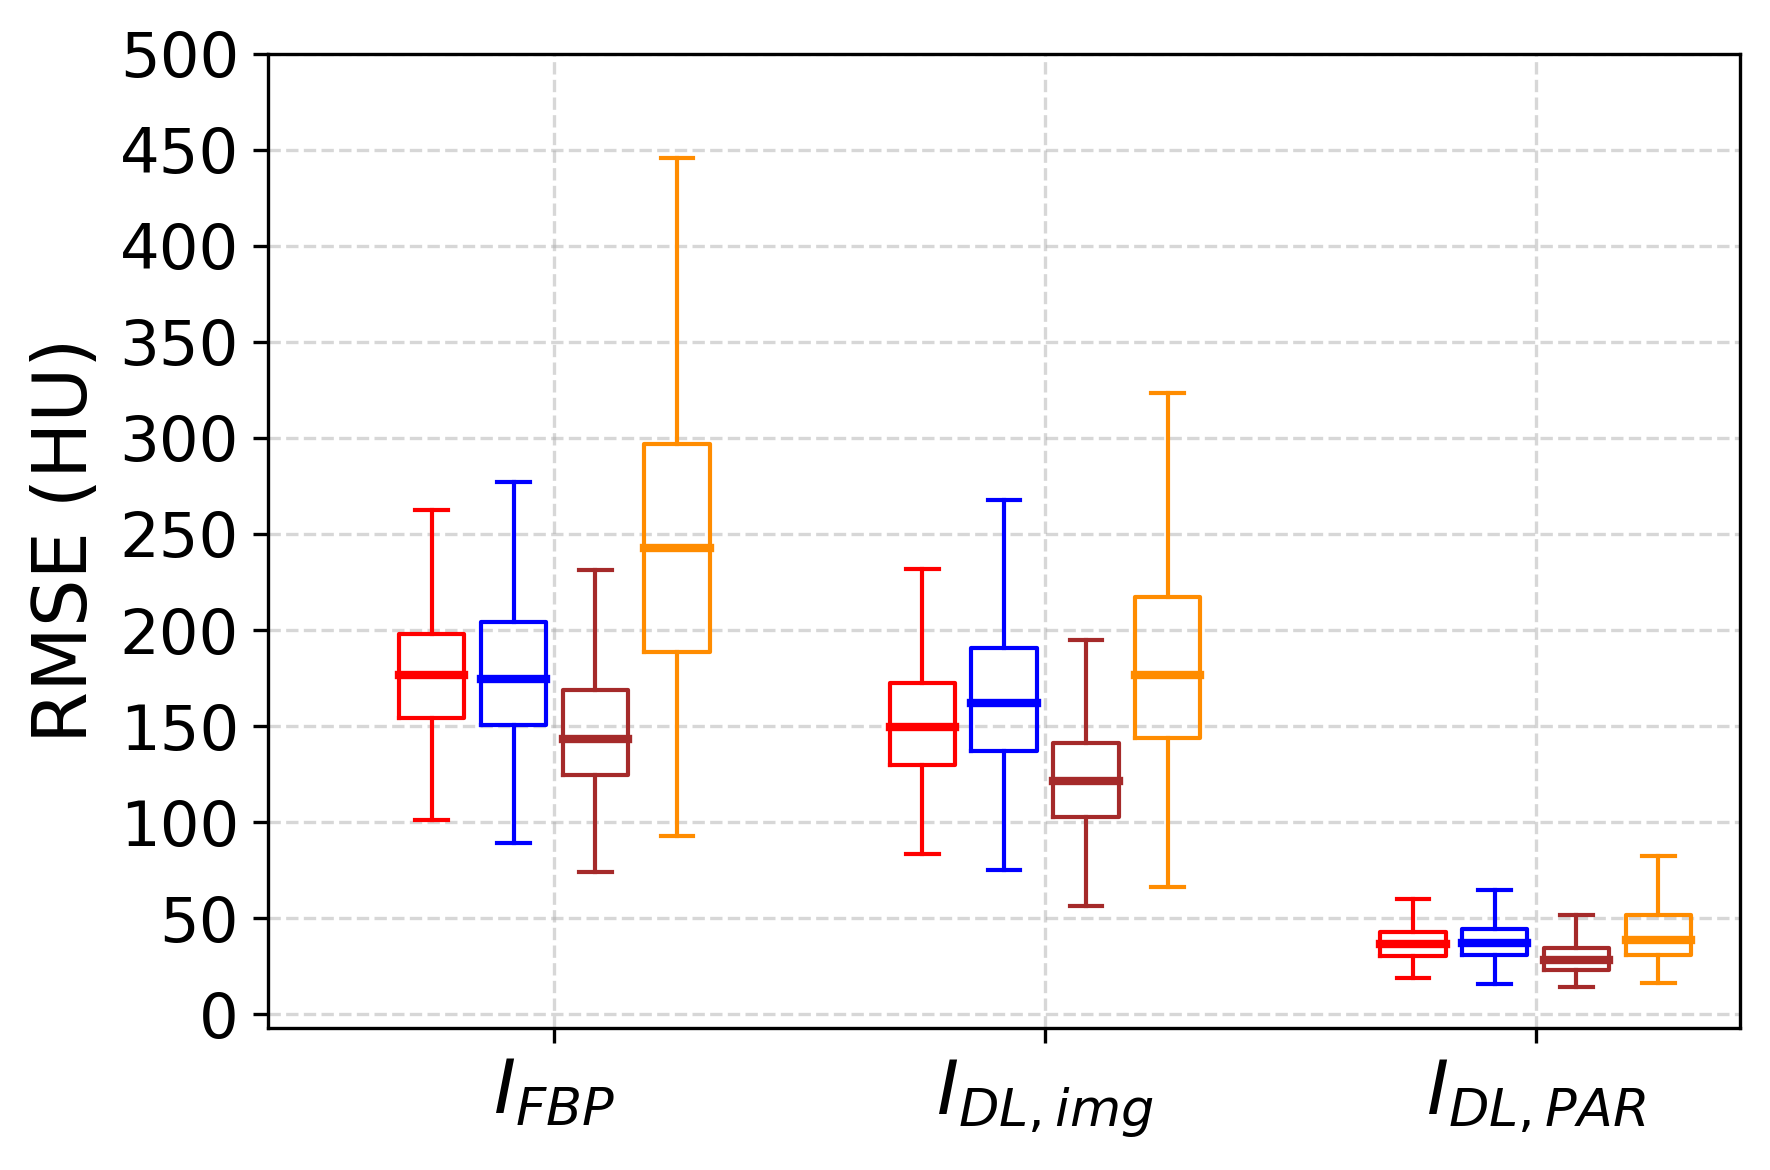

In [11]:
save_path = os.path.join(main_path,'pictures/Manuscript/box_plot_MAE.eps')

# font2 is typically used for legend
data_all = [motion_all, cnn_all, par_all]
data_bottom = [motion_bottom, cnn_bottom, par_bottom]
data_middle = [motion_middle, cnn_middle, par_middle]
data_top = [motion_top, cnn_top, par_top]


ticks = ['$I_{FBP}$', '$I_{DL,img}$','$I_{DL,PAR}$']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=2)

plt.figure(figsize= (6,4), dpi = 300)

bp_all = plt.boxplot(data_all, positions=[1.0, 4.0, 7.0 ], sym='', widths=0.4)
bp_bottom = plt.boxplot(data_bottom, positions=[1.5, 4.5, 7.5], sym='', widths=0.4)
bp_middle = plt.boxplot(data_middle, positions=[2.0, 5.0, 8.0 ], sym='', widths=0.4)
bp_top = plt.boxplot(data_top, positions=[2.5, 5.5, 8.5], sym='', widths=0.4)

set_box_color(bp_all, 'red') # colors are from http://colorbrewer2.org/
set_box_color(bp_bottom, 'blue')
set_box_color(bp_middle, 'brown')
set_box_color(bp_top, 'darkorange')


plt.xticks([1.75, 4.75, 7.75], ticks,fontsize = 18)
plt.xlim(-0, 9)
plt.yticks(np.arange(0.,500.1,step = 50),fontsize=15)
plt.grid(True, linestyle='dashed', alpha=0.5)
plt.ylabel("RMSE (HU)",fontsize=18)
plt.tight_layout()

# save
plt.savefig(save_path, format='eps')